20120115 컴퓨터공학부 조한솔


Link : https://github.com/criticaster/assignment05

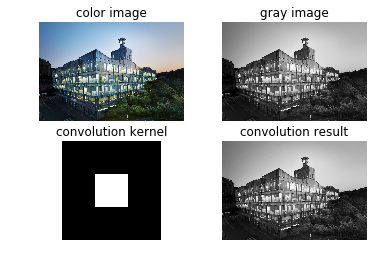

In [47]:

"""
assignment05-1.py

"""
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
from skimage import io, color
from skimage import exposure
from skimage import filters #skimage의 filters 추가

file_image	= 'cau.jpg'

im_color 	= io.imread(file_image)
im_gray  	= color.rgb2gray(im_color)

ker 		= np.array([[0,0,0],[0,1,0],[0,0,0]]) 
im_conv		= signal.convolve2d(im_gray, ker, boundary='symm', mode='same') 

p1 = plt.subplot(2,2,1)
p1.set_title('color image')
plt.imshow(im_color)
plt.axis('off')

p2 = plt.subplot(2,2,2)
p2.set_title('gray image')
plt.imshow(im_gray, cmap='gray')
plt.axis('off')

p3 = plt.subplot(2,2,3)
p3.set_title('convolution kernel')
plt.imshow(ker, cmap='gray')
plt.axis('off')

p4 = plt.subplot(2,2,4)
p4.set_title('convolution result')
plt.imshow(im_conv, cmap='gray')
plt.axis('off')

plt.show()

이미지를 읽어오기

In [48]:
def make_color(file_image):
    color_result = io.imread(file_image)
    return color_result

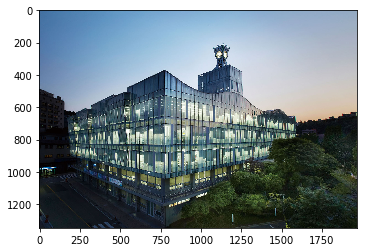

In [49]:
file_image = 'cau.jpg'
color_image = make_color(file_image)

plt.imshow(color_image)
plt.show()

회색 이미지로 변환

In [50]:
def make_gray(color_image):
    
    gray_result = color.rgb2gray(color_image)
    
    return gray_result

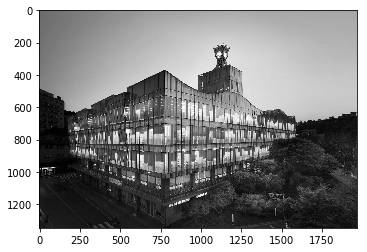

In [51]:
gray_image = make_gray(color_image)

plt.imshow(gray_image, cmap='gray')
plt.show()

skimage filters로 x의 derivative 나타내기

In [52]:
def derivative_x(gray_image):
    
    edges_x = filters.sobel_h(gray_image)
    plt.imshow(edges_x, cmap='gray')
    plt.show()
    
    return edges_x

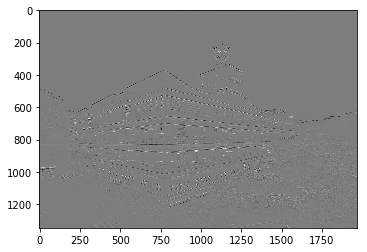

In [53]:
edges_x = derivative_x(im_gray)

skimage filters로 y의 derivative 나타내기

In [54]:
def derivative_y(gray_image):
    
    edges_y = filters.sobel_v(gray_image)
    plt.imshow(edges_y, cmap='gray')
    plt.show()
    
    return edges_y

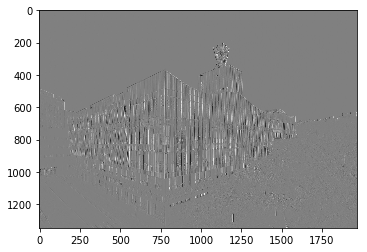

In [55]:
edges_y = derivative_y(im_gray)

derivative x,y를 합쳐 이미지로 나타내기

In [56]:
def make_sobel(edges_x, edges_y):
    
    sobel = np.hypot(edges_x, edges_y)
    
    plt.imshow(sobel, cmap=plt.cm.gray)
    plt.show()

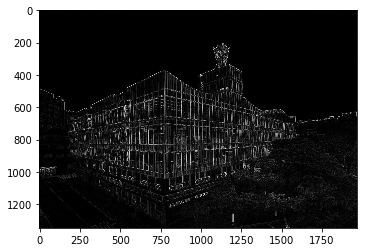

In [57]:
make_sobel(edges_x, edges_y)

임의로 지정한 convolution kernel set

In [58]:
k1 = np.array([[1.0,2.0,1.0],[2.0,4.0,2.0],[1.0,2.0,1.0]])

k2 = np.array([[-1/3,-1/3,-1/3] ,[-1/3,-1/3,-1/3], [-1/3,-1/3,-1/3]])

k1, k2의 커널을 이미지로 나타내기

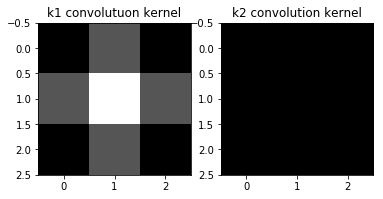

In [59]:
f1 = plt.subplot(1,2,1)
f1.set_title('k1 convolutuon kernel')
plt.imshow(k1, cmap='gray')

f2 = plt.subplot(1,2,2)
f2.set_title('k2 convolution kernel')
plt.imshow(k2, cmap='gray')

gray_image에 임의의 kernel을 적용

In [60]:
def apply_kernel(gray_image, kernel):
    
    convert_image = signal.convolve2d(gray_image, kernel, boundary='symm', mode='same')
    
    return convert_image

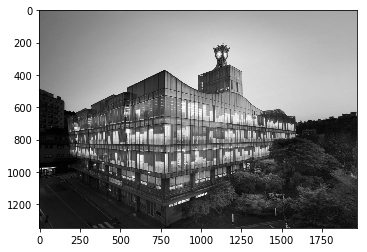

In [61]:
con1 = apply_kernel(im_gray, k1)

plt.imshow(con1, cmap='gray')
plt.show()

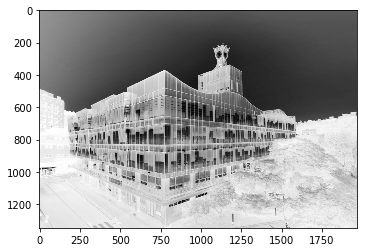

In [62]:
con2 = apply_kernel(im_gray, k2)

plt.imshow(con2,cmap='gray')
plt.show()